# Jupyter interactive widgets

You've seen the previous year's projects using widgets (sliders, dropdowns) to make their models explorable. We'll do a quik rundown of how to implement some of them.

I've used these websites as guides: https://towardsdatascience.com/bring-your-jupyter-notebook-to-life-with-interactive-widgets-bc12e03f0916, https://coderzcolumn.com/tutorials/python/interactive-widgets-in-jupyter-notebook-using-ipywidgets

As well as these projects: https://nanohub.org/tools/neursynch, https://nanohub.org/tools/radiationsim

And the widgets' documentation https://ipywidgets.readthedocs.io/en/7.x/

In [8]:
import tellurium as te

## Importing

In [9]:
import ipywidgets as widgets # for the widgets
from IPython.display import display # to display them

## What is and isn't there
The ``ipywidgets`` for tellurium in nanoHUB is not up to date. Let's see which version it is and what is there

In [10]:
print(widgets.__version__)
print(dir(widgets))

7.1.2
['Accordion', 'BoundedFloatText', 'BoundedIntText', 'Box', 'Button', 'ButtonStyle', 'CallbackDispatcher', 'Checkbox', 'Color', 'ColorPicker', 'Controller', 'CoreWidget', 'DOMWidget', 'DatePicker', 'Datetime', 'Dropdown', 'FloatProgress', 'FloatRangeSlider', 'FloatSlider', 'FloatText', 'HBox', 'HTML', 'HTMLMath', 'Image', 'IntProgress', 'IntRangeSlider', 'IntSlider', 'IntText', 'Label', 'Layout', 'NumberFormat', 'Output', 'Password', 'Play', 'RadioButtons', 'Select', 'SelectMultiple', 'SelectionRangeSlider', 'SelectionSlider', 'SliderStyle', 'Style', 'Tab', 'Text', 'Textarea', 'ToggleButton', 'ToggleButtons', 'ToggleButtonsStyle', 'VBox', 'Valid', 'ValueWidget', 'Widget', '__builtins__', '__cached__', '__doc__', '__file__', '__jupyter_widgets_base_version__', '__jupyter_widgets_controls_version__', '__loader__', '__name__', '__package__', '__path__', '__protocol_version__', '__spec__', '__version__', '_handle_ipython', '_version', 'dlink', 'docutils', 'domwidget', 'fixed', 'get_ip

### A simple example

A slider that only uses integers. We can set the min / max number, the step size (presumably it has to be an integer), add a description to the slider, and the start value

In [4]:
int_slider = widgets.IntSlider(
    min=0,
    max=10,
    step=1,
    description='My first slider:',
    value=3
)
display(int_slider)

IntSlider(value=3, description='My first slider:', max=10)

Now I'll grab the value from the slider and I'll print it's cube root

In [12]:
v = int_slider.value # of the object int_slider get me the attribute value
print(v**(1/3))

1.4422495703074083


### Not very interactive so far
We can make things interactive by using ipywidgets' ``interact`` (``ipywidgets.interact``, or, in our case, ``widgets.interact``), https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html

Let's create a slider that imediatly prints the cube root of it's value. 

Interact is a function, but unlike most, if not all, functions we've used in class so far it expects another function as it's first argument; and as second the value it should pass to that function. 

Basically, first you tell ``interact`` what to do with the number and then which number to use. 

Let's create a function that calculates the cube root

In [30]:
def cube_root(value):
    return value**(1/3)
widgets.interact(cube_root, value=widgets.IntSlider(
    min=0,
    max=10,
    step=1,
    description='My first slider:',
    value=3
))

interactive(children=(IntSlider(value=3, description='My first slider:', max=10), Output()), _dom_classes=('widget-interact',))

<function __main__.cube_root(value)>

#### Sprinkle some magic
We can make things more compact by using function decorators. Decorators are a bit of python magic (technical term) that change how a function functions. 

https://www.geeksforgeeks.org/decorators-in-python/

https://realpython.com/primer-on-python-decorators/

Making ``cube_root`` interaction compact

In [32]:
@widgets.interact(x=int_slider)
def cube_root_magic(x):
    return x**(1/3)

AttributeError: 'IntSlider' object has no attribute 'copy'

Notice that ``cube_root``'s argument is named ``value`` and we passed ``value=???`` to ``widgets.interact``. If ``cube_root``'s argument was ``x`` we'd pass ``x=???`` to ``widgets.interact`` (just as we did for the decorator version).

## More than 1 argument funcitons
We can, and you'll need to, have more complicated functions and interations. Let's start by drawing an elipsis. We have to import a couple more things and define a couple of functions

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
def elipsis(r1, r2):
    theta = np.linspace(0, 2*np.pi, 150)
    return r1 * np.cos(theta), r2 * np.sin(theta)
def draw_elipsis(radius1, radius2):
    x, y = elipsis(radius1, radius2)
    plt.plot(x, y)
    plt.xlim(-20.1, 20.1) # set xrange and yrange to be from -max radius to max radius
    plt.ylim(-20.1, 20.1)
    ax = plt.gca() # get current axis (gca)
    ax.set_aspect(1) # set spect ratio to be 1 (square plot, easier to see elipsis)
    plt.show()

Now we can add two sliders (one for r1, one for r2) and interact with ``draw_elipsis``

In [14]:
 widgets.interact(draw_elipsis, 
                  radius1 = widgets.FloatSlider(
                            min = 0.5, 
                            max = 20, 
                            step=.5, 
                            description='X major axis:',
                            value=3), 
                  radius2 = widgets.FloatSlider(
                            min = 0.5, 
                            max = 20, 
                            step=.5, 
                            description='Y major axis:',
                            value=4))

interactive(children=(FloatSlider(value=3.0, description='X major axis:', max=20.0, min=0.5, step=0.5), FloatSlider(value=4.0, description='Y major axis:', max=20.0, min=0.5, step=0.5), Output()), _dom_classes=('widget-interact',))

<function __main__.draw_elipsis(radius1, radius2)>

## Dealing with slowness

Drawing an elipsis is not that computationally taxing and we can already see lag if we drag the sliders fast. By default the interations are updated live, we can easilly change that by passing ``continuous_update=False`` to the *sliders* (not to interact). With that option the updates will be made on click-release

In [18]:
 widgets.interact(draw_elipsis, 
                  radius1 = widgets.FloatSlider(
                            min = 0.5, 
                            max = 20, 
                            step=.5, 
                            description='X major axis:',
                            value=3, continuous_update=False), 
                  radius2 = widgets.FloatSlider(
                            min = 0.5, 
                            max = 20, 
                            step=.5, 
                            description='Y major axis:',
                            value=4, continuous_update=False))

interactive(children=(FloatSlider(value=3.0, continuous_update=False, description='X major axis:', max=20.0, min=0.5, step=0.5), FloatSlider(value=4.0, continuous_update=False, description='Y major axis:', max=20.0, min=0.5, step=0.5), Output()), _dom_classes=('widget-interact',))

<function __main__.draw_elipsis(radius1, radius2)>

#### A more interactive way to deal with slowness (and it saves typing)
Is to use ``interact_manual`` instead of ``widgets.interact``. It will create a button to make the update

In [15]:
 widgets.interact_manual(draw_elipsis, 
                  radius1 = widgets.FloatSlider(
                            min = 0.5, 
                            max = 20, 
                            step=.5, 
                            description='X major axis:',
                            value=3), 
                  radius2 = widgets.FloatSlider(
                            min = 0.5, 
                            max = 20, 
                            step=.5, 
                            description='Y major axis:',
                            value=4))

interactive(children=(FloatSlider(value=3.0, description='X major axis:', max=20.0, min=0.5, step=0.5), FloatSlider(value=4.0, description='Y major axis:', max=20.0, min=0.5, step=0.5), Button(description='Run Interact', style=ButtonStyle()), Output()), _dom_classes=('widget-interact',))

<function __main__.draw_elipsis(radius1, radius2)>

# A more concrete example, SIR+death

Let's make an interactive SIR with death

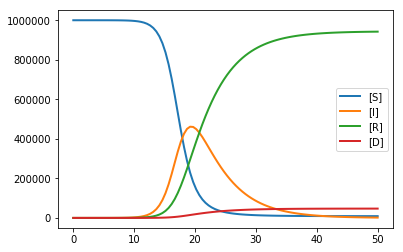

In [20]:
sir_string = r'''
    // fluxes
    E1: S -> I; n * gamma1 * I * S/S0; //infection
    E2: I -> R; mu * I; // recovery
    E3: I -> D; kID * I // death
    
    // parameters
    gamma1 = 0.1;
    n = 10; 
    mu = 1./5.;
    kID = 0.01;
    
    // Initial conditions
    S0 = 1E6;
    
    I = 1;
    R = 0;
    D = 0;
    
    S = S0 - I - R - D;
    
'''

m = te.loada(sir_string)
s = m.simulate(0, 50, 100)
m.plot()

#### I think that here it may be easier to define the sliders separatly

Just as we did with ``cube_root``. You can do it in a single block (like we did with the elipsis) but *my preference* is to do it separatly when there are many sliders.

In [21]:
# gamma = 0.1;
gamma_slider = widgets.FloatSlider(
                            min = m['gamma1']/100, 
                            max = min(1, m['gamma1']*100), 
                            step=.001, 
                            description='gamma1:',
                            value=m['gamma1'])
# n = 10; 
n_slider = widgets.IntSlider(
                            min = max(1, m['n']/100), 
                            max = m['n']*10, 
                            step=1, 
                            description='Avg daily encounters:',
                            value=m['n'])
# mu = 1./5.;
mu_slider = widgets.FloatSlider(
                            min = m['mu']/100, 
                            max = min(1, m['mu']*100), 
                            step=.001, 
                            description='mu:',
                            value=m['mu'])
# kID = 0.01;

kID_slider = widgets.FloatSlider(
                            min = m['kID']/100, 
                            max = min(1, m['kID']*100), 
                            step=.001, 
                            description='Death rate:',
                            value=m['kID'])

I only implemented sliders for the rates, we can add sliders for the initial conditions too, or anything. Also, notice that I used the IntSlider for the number of encounters

#### And the function combining the model and the sliders

In [22]:
def slider_SIRD(gamma, n, mu, kID):
    sir_string = r'''
    // fluxes
    E1: S -> I; n * gamma1 * I * S/S0; //infection
    E2: I -> R; mu * I; // recovery
    E3: I -> D; kID * I // death
    
    // parameters
    gamma1 = 0.1;
    n = 10; 
    mu = 1./5.;
    kID = 0.01;
    
    // Initial conditions
    S0 = 1E6;
    
    I = 1;
    R = 0;
    D = 0;
    
    S = S0 - I - R - D;
    
    '''
    
    m = te.loada(sir_string) # laod the model
    
    m['gamma1'] = gamma # change the model
    m['n'] = n
    m['mu'] = mu
    m['kID'] = kID
    
    s = m.simulate(0, 50, 100)
    m.plot()
#     return m, s

In [23]:
r = widgets.interact_manual(slider_SIRD, gamma=gamma_slider, n=n_slider, mu=mu_slider, kID=kID_slider)

interactive(children=(FloatSlider(value=0.1, description='gamma1:', max=1.0, min=0.001, step=0.001), IntSlider(value=10, description='Avg daily encounters:', min=1), FloatSlider(value=0.2, description='mu:', max=1.0, min=0.002, step=0.001), FloatSlider(value=0.01, description='Death rate:', max=1.0, min=0.0001, step=0.001), Button(description='Run Interact', style=ButtonStyle()), Output()), _dom_classes=('widget-interact',))

## Multiple models
If you want to have the user select one model option among many we can use the ``Dropdown`` widget. As an example we can create a function that either uses the SIRD or SIR model

In [24]:
def SIR_or_SIRD(select, gamma, n, mu, kID):
    if select == 'SIRD':
        model_string = r'''
                    // fluxes
                    E1: S -> I; n * gamma1 * I * S/S0; //infection
                    E2: I -> R; mu * I; // recovery
                    E3: I -> D; kID * I // death

                    // parameters
                    gamma1 = 0.1;
                    n = 10; 
                    mu = 1./5.;
                    kID = 0.01;

                    // Initial conditions
                    S0 = 1E6;

                    I = 1;
                    R = 0;
                    D = 0;

                    S = S0 - I - R - D;

                    '''
    elif select == 'SIR':
        model_string = r'''
                    // fluxes
                    E1: S -> I; n * gamma1 * I * S/S0; //infection
                    E2: I -> R; mu * I; // recovery

                    // parameters
                    gamma1 = 0.1;
                    n = 10; 
                    mu = 1./5.;

                    // Initial conditions
                    S0 = 1E6;

                    I = 1;
                    R = 0;

                    S = S0 - I - R;

                    '''
    else:
        raise ValueError(f'Unknown option {select}. Valid options are "SIR" and "SIRD"')
    m = te.loada(model_string) # laod the model
    
    m['gamma1'] = gamma # change the model
    m['n'] = n
    m['mu'] = mu
    if select == 'SIRD':
        m['kID'] = kID
    
    s = m.simulate(0, 50, 100)
    m.plot()

Notice that even though we have the sliders configured and ready to be used with the variable names ``gamma_slider``, ``n_slider``, ``mu_slider``, ``kID_slider`` I am "recreating" them and passing the recreation to ``widgets.interact_manual``. I'm doing this because otherwise changing the slider, e.g., ``gamma_slider`` here would change it everywhere else in the notebook. This has caused some plotting errors for me.

In [33]:
widgets.interact_manual(SIR_or_SIRD, 
                            select = widgets.Dropdown(options=['SIRD', 'SIR'],
                                                      description='Model options:'),
                            gamma=widgets.FloatSlider(
                                    min = m['gamma1']/100, 
                                    max = min(1, m['gamma1']*100), 
                                    step=.001, 
                                    description='gamma1:',
                                    value=m['gamma1']),
                            n=widgets.IntSlider(
                                    min = max(1, m['n']/100), 
                                    max = m['n']*10, 
                                    step=1, 
                                    description='Avg daily encounters:',
                                    value=m['n']), 
                            mu=widgets.FloatSlider(
                                    min = m['mu']/100, 
                                    max = min(1, m['mu']*100), 
                                    step=.001, 
                                    description='mu:',
                                    value=m['mu']), 
                            kID=widgets.FloatSlider(
                                    min = m['kID']/100, 
                                    max = min(1, m['kID']*100), 
                                    step=.001, 
                                    description='Death rate:',
                                    value=m['kID']))

interactive(children=(Dropdown(description='Model options:', options=('SIRD', 'SIR'), value='SIRD'), FloatSlider(value=0.1, description='gamma1:', max=1.0, min=0.001, step=0.001), IntSlider(value=10, description='Avg daily encounters:', min=1), FloatSlider(value=0.2, description='mu:', max=1.0, min=0.002, step=0.001), FloatSlider(value=0.01, description='Death rate:', max=1.0, min=0.0001, step=0.001), Button(description='Run Interact', style=ButtonStyle()), Output()), _dom_classes=('widget-interact',))

<function __main__.SIR_or_SIRD(select, gamma, n, mu, kID)>

# Separating plots
If you have too many lines in the same plot it becomes hard to notice things. If the values plotted are too dissimilar it also conterproductiove to plot them in the same graph. 

Let's see how to have 4 plots aranged in 2x2

In [35]:
def slider_SIRD_separated(gamma, n, mu, kID):
    sir_string = r'''
    // fluxes
    E1: S -> I; n * gamma1 * I * S/S0; //infection
    E2: I -> R; mu * I; // recovery
    E3: I -> D; kID * I // death
    
    // parameters
    gamma1 = 0.1;
    n = 10; 
    mu = 1./5.;
    kID = 0.01;
    
    // Initial conditions
    S0 = 1E6;
    
    I = 1;
    R = 0;
    D = 0;
    
    S = S0 - I - R - D;
    
    '''
    
    m = te.loada(sir_string) # laod the model
    
    m['gamma1'] = gamma # change the model
    m['n'] = n
    m['mu'] = mu
    m['kID'] = kID
    
    s = m.simulate(0, 50, 100)
#     m.plot()
#     return m, s
    fig, axs = plt.subplots(2, 2) # 4 subplots in 2x2
    
    axs[0,0].plot(s['time'], s['[S]']/m['S0']) # top left subplot [0,0]
    axs[0,0].set_title('Susceptible pop %')
    axs[0,1].plot(s['time'], s['[I]']/m['S0']) # top right subplot [0,1]
    axs[0,1].set_title('Infected pop %')
    axs[1,0].plot(s['time'], s['[R]']/m['S0']) # bottom left subplot [1,0]
    axs[1,0].set_title('Recovered pop %')
    axs[1,1].plot(s['time'], s['[D]']/m['S0']) # bottom right subplot [1,1]
    axs[1,1].set_title('Dead pop %')
    plt.tight_layout()
    plt.show()

In [36]:
widgets.interact_manual(slider_SIRD_separated, gamma=widgets.FloatSlider(
                                    min = m['gamma1']/100, 
                                    max = min(1, m['gamma1']*100), 
                                    step=.001, 
                                    description='gamma1:',
                                    value=m['gamma1']),
                            n=widgets.IntSlider(
                                    min = max(1, m['n']/100), 
                                    max = m['n']*10, 
                                    step=1, 
                                    description='Avg daily encounters:',
                                    value=m['n']), 
                            mu=widgets.FloatSlider(
                                    min = m['mu']/100, 
                                    max = min(1, m['mu']*100), 
                                    step=.001, 
                                    description='mu:',
                                    value=m['mu']), 
                            kID=widgets.FloatSlider(
                                    min = m['kID']/100, 
                                    max = min(1, m['kID']*100), 
                                    step=.001, 
                                    description='Death rate:',
                                    value=m['kID']))

interactive(children=(FloatSlider(value=0.1, description='gamma1:', max=1.0, min=0.001, step=0.001), IntSlider(value=10, description='Avg daily encounters:', min=1), FloatSlider(value=0.2, description='mu:', max=1.0, min=0.002, step=0.001), FloatSlider(value=0.01, description='Death rate:', max=1.0, min=0.0001, step=0.001), Button(description='Run Interact', style=ButtonStyle()), Output()), _dom_classes=('widget-interact',))

<function __main__.slider_SIRD_separated(gamma, n, mu, kID)>